<a href="https://colab.research.google.com/github/riminipa16/CodeAlpha_Handwritten_Character_recognition/blob/main/Handwritten_character_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries


In [10]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers, models

# 1. Load EMNIST via TensorFlow Datasets (Most reliable method)
print("Downloading and preparing dataset...")
ds_train, ds_info = tfds.load('emnist/balanced', split='train', with_info=True, as_supervised=True)
ds_test = tfds.load('emnist/balanced', split='test', as_supervised=True)

# 2. Preprocessing function
def preprocess(image, label):
    # Convert to float and normalize
    image = tf.cast(image, tf.float32) / 255.0
    # EMNIST images in TFDS are rotated; this fix ensures they are upright
    image = tf.transpose(image, perm=[1, 0, 2])
    return image, label

# 3. Batch the data
train_batches = ds_train.map(preprocess).shuffle(10000).batch(128).prefetch(tf.data.AUTOTUNE)
test_batches = ds_test.map(preprocess).batch(128).prefetch(tf.data.AUTOTUNE)

print("Dataset ready!")

Dataset ready!


In [11]:
# Define the CNN architecture
model = models.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten and Dense Layers
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),  # Prevents overfitting
    layers.Dense(47, activation='softmax') # 47 classes (0-9, A-Z, some a-z)
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       409,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 47)             │        12,079 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 440,751 (1.68 MB)

 Trainable params: 440,751 (1.68 MB)

 Non-trainable params: 0 (0.00 B)

Starting training...
Epoch 1/5
882/882 ━━━━━━━━━━━━━━━━━━━━ 110s 122ms/step - accuracy: 0.6029 - loss: 1.3926 - val_accuracy: 0.8427 - val_loss: 0.4669
Epoch 2/5
882/882 ━━━━━━━━━━━━━━━━━━━━ 105s 118ms/step - accuracy: 0.8342 - loss: 0.4939 - val_accuracy: 0.8621 - val_loss: 0.4043
Epoch 3/5
882/882 ━━━━━━━━━━━━━━━━━━━━ 137s 113ms/step - accuracy: 0.8541 - loss: 0.4191 - val_accuracy: 0.8689 - val_loss: 0.3748
Epoch 4/5
882/882 ━━━━━━━━━━━━━━━━━━━━ 104s 117ms/step - accuracy: 0.8665 - loss: 0.3752 - val_accuracy: 0.8736 - val_loss: 0.3605
Epoch 5/5
882/882 ━━━━━━━━━━━━━━━━━━━━ 99s 112ms/step - accuracy: 0.8739 - loss: 0.3460 - val_accuracy: 0.8729 - val_loss: 0.3605


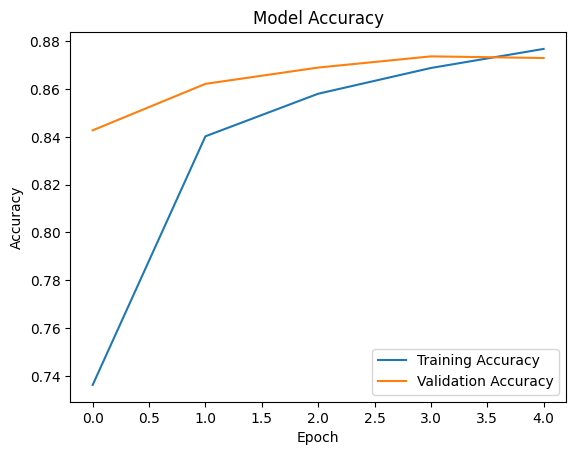

In [12]:
# Training for 5 epochs
print("Starting training...")
history = model.fit(train_batches, epochs=5, validation_data=test_batches)

# Plot training results
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Upload a photo of a single handwritten character.


Saving 55.JPG to 55.JPG
Processing image shape: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


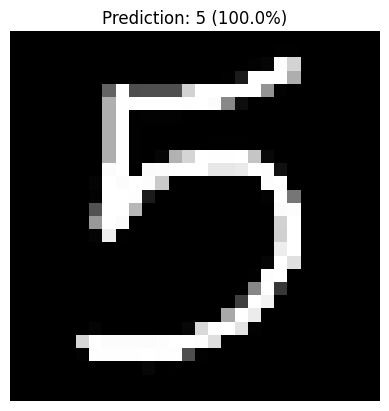

In [19]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Mapping for the 47 Balanced classes
class_mapping = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrt"

print("Upload a photo of a single handwritten character.")
uploaded = files.upload()

for fn in uploaded.keys():
    # 1. Load and convert to grayscale
    img = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Error: Could not load image {fn}")
        continue

    # 2. Resize to 28x28
    img_resized = cv2.resize(img, (28, 28))

    # 3. Invert (Match EMNIST: white text on black background)
    img_inverted = cv2.bitwise_not(img_resized)

    # 4. Normalize
    img_input = img_inverted.astype('float32') / 255.0

    # 5. Fix Shape: (Batch_size, Height, Width, Channels) -> (1, 28, 28, 1)
    img_input = np.expand_dims(img_input, axis=-1) # Adds the channel (1)
    img_input = np.expand_dims(img_input, axis=0)  # Adds the batch (1)

    # Check shape - should be (1, 28, 28, 1)
    print(f"Processing image shape: {img_input.shape}")

    # 6. Predict
    prediction = model.predict(img_input)
    predicted_idx = np.argmax(prediction)
    predicted_char = class_mapping[predicted_idx]
    confidence = np.max(prediction) * 100

    # 7. Show result
    plt.imshow(img_inverted, cmap='gray')
    plt.title(f"Prediction: {predicted_char} ({confidence:.1f}%)")
    plt.axis('off')
    plt.show()